In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 19 17:51:42 2021

@author: wanjinyu
"""

import MLmodels
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process.kernels import RBF, DotProduct

Using TensorFlow backend.


In [2]:
def Henon(N, Nstep):
    '''
    Sample initial conditions with a grid of N*N within the range [-.3,.3]
    Track intial conditions follwing Henon map over Nstep time steps
    
    Those whose amplitudes increase infinitely is lost
    The trajectory over first 5 time steps is data feature for training
    '''
    xlist = np.linspace(-0.3,0.3,N)
    xxi = np.zeros([N**2,Nstep+1])
    yyi = np.zeros([N**2,Nstep+1])
    for i in range(N):
        for j in range(N):
            xxi[i*N+j,0] = xlist[i]
            yyi[i*N+j,0] = xlist[j]
        
    mu = 1/3
    for i in range(Nstep):
        tempx = xxi[:,i]*np.cos(mu)+(yyi[:,i]-xxi[:,i]**2)*np.sin(mu)
        tempy = -xxi[:,i]*np.sin(mu)+(yyi[:,i]-xxi[:,i]**2)*np.cos(mu)
        xxi[:,i+1] = tempx
        yyi[:,i+1] = tempy

    max_A = np.isnan(xxi[:,-1])
#    surviveid = np.where(max_A==False)[0]

    data = np.zeros([N**2,2*Nstep+2])
    for i in range(Nstep+1):
        data[:,i*2] = xxi[:,i]
        data[:,i*2+1] = yyi[:,i]
    
    TrainingData = data[:,0:12]

    label = np.ones(N**2)
    label[np.where(max_A==True)[0]] = -1
    # training labels for NN
    NNlabel = np.zeros([N**2,2])
    NNlabel[max_A,1] = 1
    NNlabel[~max_A,0] = 1
    return TrainingData, label, NNlabel, data

In [3]:
TrainingData, label, NNlabel, data = Henon(30,500)

'''randomly select training samples'''
scaler = MinMaxScaler()
TrainingData = scaler.fit_transform(TrainingData)
Ntrain = round(0.1*len(TrainingData[:,0]))
idx = np.arange(0,len(TrainingData[:,0]))
np.random.shuffle(idx)
data = data[idx,:]
label = label[idx]
NNlabel = NNlabel[idx,:]
TrainingData = TrainingData[idx,:]
TrainX = TrainingData[0:Ntrain,:]
TrainY = label[0:Ntrain]
TrainY_NN = NNlabel[0:Ntrain,:]
TrainX_unlabeled = TrainingData[Ntrain:,:]

D:\anaconda\envs\keras\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in square
D:\anaconda\envs\keras\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square
D:\anaconda\envs\keras\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in add


In [4]:
'''train ML models of RF, GP, SVM, TSVM and NN'''
ML = MLmodels.MLmodels()
ML.initialTSVM(1.5, 'rbf')
ML.initialSVM(1.5, 'rbf')
ML.initialRF()
kernel = 1.0 * RBF(1.0)
ML.initialGP(kernel)
ML.initialNN([12,64])

ML.trainTSVM(TrainX, TrainY.reshape(len(TrainY),1), TrainX_unlabeled)
ML.trainSVM(TrainX, TrainY)
ML.trainRF(TrainX, TrainY)
ML.trainGP(TrainX, TrainY)
ML.trainNN(TrainX, TrainY_NN)

Epoch 1/3000
90/90 [==============================] - 0s 2ms/step - loss: 0.2395 - mse: 0.2395
Epoch 2/3000
90/90 [==============================] - 0s 44us/step - loss: 0.2295 - mse: 0.2295
Epoch 3/3000
90/90 [==============================] - 0s 44us/step - loss: 0.2305 - mse: 0.2305
Epoch 4/3000
90/90 [==============================] - 0s 55us/step - loss: 0.2296 - mse: 0.2296
Epoch 5/3000
90/90 [==============================] - 0s 33us/step - loss: 0.2283 - mse: 0.2283
Epoch 6/3000
90/90 [==============================] - 0s 44us/step - loss: 0.2263 - mse: 0.2263
Epoch 7/3000
90/90 [==============================] - 0s 55us/step - loss: 0.2247 - mse: 0.2247
Epoch 8/3000
90/90 [==============================] - 0s 45us/step - loss: 0.2234 - mse: 0.2234
Epoch 9/3000
90/90 [==============================] - 0s 44us/step - loss: 0.2232 - mse: 0.2232
Epoch 10/3000
90/90 [==============================] - 0s 55us/step - loss: 0.2222 - mse: 0.2222
Epoch 11/3000
90/90 [===================

90/90 [==============================] - 0s 44us/step - loss: 0.1751 - mse: 0.1751
Epoch 86/3000
90/90 [==============================] - 0s 56us/step - loss: 0.1745 - mse: 0.1745
Epoch 87/3000
90/90 [==============================] - 0s 44us/step - loss: 0.1739 - mse: 0.1739
Epoch 88/3000
90/90 [==============================] - 0s 33us/step - loss: 0.1731 - mse: 0.1731
Epoch 89/3000
90/90 [==============================] - 0s 44us/step - loss: 0.1730 - mse: 0.1730
Epoch 90/3000
90/90 [==============================] - 0s 45us/step - loss: 0.1725 - mse: 0.1725
Epoch 91/3000
90/90 [==============================] - 0s 33us/step - loss: 0.1713 - mse: 0.1713
Epoch 92/3000
90/90 [==============================] - 0s 33us/step - loss: 0.1714 - mse: 0.1714
Epoch 93/3000
90/90 [==============================] - 0s 44us/step - loss: 0.1707 - mse: 0.1707
Epoch 94/3000
90/90 [==============================] - 0s 33us/step - loss: 0.1693 - mse: 0.1693
Epoch 95/3000
90/90 [=======================

90/90 [==============================] - 0s 33us/step - loss: 0.1242 - mse: 0.1242
Epoch 169/3000
90/90 [==============================] - 0s 56us/step - loss: 0.1243 - mse: 0.1243
Epoch 170/3000
90/90 [==============================] - 0s 33us/step - loss: 0.1246 - mse: 0.1246
Epoch 171/3000
90/90 [==============================] - 0s 33us/step - loss: 0.1226 - mse: 0.1226
Epoch 172/3000
90/90 [==============================] - 0s 33us/step - loss: 0.1215 - mse: 0.1215
Epoch 173/3000
90/90 [==============================] - 0s 44us/step - loss: 0.1235 - mse: 0.1235
Epoch 174/3000
90/90 [==============================] - 0s 33us/step - loss: 0.1203 - mse: 0.1203
Epoch 175/3000
90/90 [==============================] - 0s 34us/step - loss: 0.1210 - mse: 0.1210
Epoch 176/3000
90/90 [==============================] - 0s 44us/step - loss: 0.1194 - mse: 0.1194
Epoch 177/3000
90/90 [==============================] - 0s 33us/step - loss: 0.1184 - mse: 0.1184
Epoch 178/3000
90/90 [=============

90/90 [==============================] - 0s 44us/step - loss: 0.0783 - mse: 0.0783
Epoch 252/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0785 - mse: 0.0785
Epoch 253/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0786 - mse: 0.0786
Epoch 254/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0788 - mse: 0.0788
Epoch 255/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0762 - mse: 0.0762
Epoch 256/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0758 - mse: 0.0758
Epoch 257/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0756 - mse: 0.0756
Epoch 258/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0761 - mse: 0.0761
Epoch 259/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0757 - mse: 0.0757
Epoch 260/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0746 - mse: 0.0746
Epoch 261/3000
90/90 [=============

90/90 [==============================] - 0s 44us/step - loss: 0.0595 - mse: 0.0595
Epoch 335/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0588 - mse: 0.0588
Epoch 336/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0572 - mse: 0.0572
Epoch 337/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0571 - mse: 0.0571
Epoch 338/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0575 - mse: 0.0575
Epoch 339/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0558 - mse: 0.0558
Epoch 340/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0573 - mse: 0.0573
Epoch 341/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0583 - mse: 0.0583
Epoch 342/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0553 - mse: 0.0553
Epoch 343/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0596 - mse: 0.0596
Epoch 344/3000
90/90 [=============

90/90 [==============================] - 0s 33us/step - loss: 0.0476 - mse: 0.0476
Epoch 418/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0472 - mse: 0.0472
Epoch 419/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0470 - mse: 0.0470
Epoch 420/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0472 - mse: 0.0472
Epoch 421/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0466 - mse: 0.0466
Epoch 422/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0470 - mse: 0.0470
Epoch 423/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0467 - mse: 0.0467
Epoch 424/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0474 - mse: 0.0474
Epoch 425/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0460 - mse: 0.0460
Epoch 426/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0461 - mse: 0.0461
Epoch 427/3000
90/90 [=============

90/90 [==============================] - 0s 33us/step - loss: 0.0400 - mse: 0.0400
Epoch 501/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0422 - mse: 0.0422
Epoch 502/3000
90/90 [==============================] - 0s 54us/step - loss: 0.0405 - mse: 0.0405
Epoch 503/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0421 - mse: 0.0421
Epoch 504/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0413 - mse: 0.0413
Epoch 505/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0412 - mse: 0.0412
Epoch 506/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0400 - mse: 0.0400
Epoch 507/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0429 - mse: 0.0429
Epoch 508/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0394 - mse: 0.0394
Epoch 509/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0399 - mse: 0.0399
Epoch 510/3000
90/90 [=============

90/90 [==============================] - 0s 44us/step - loss: 0.0353 - mse: 0.0353
Epoch 584/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0354 - mse: 0.0354
Epoch 585/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0354 - mse: 0.0354
Epoch 586/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0354 - mse: 0.0354
Epoch 587/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0351 - mse: 0.0351
Epoch 588/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0355 - mse: 0.0355
Epoch 589/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0351 - mse: 0.0351
Epoch 590/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0349 - mse: 0.0349
Epoch 591/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0358 - mse: 0.0358
Epoch 592/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0350 - mse: 0.0350
Epoch 593/3000
90/90 [=============

90/90 [==============================] - 0s 44us/step - loss: 0.0323 - mse: 0.0323
Epoch 667/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0331 - mse: 0.0331
Epoch 668/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0315 - mse: 0.0315
Epoch 669/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0329 - mse: 0.0329
Epoch 670/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0315 - mse: 0.0315
Epoch 671/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0317 - mse: 0.0317
Epoch 672/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0320 - mse: 0.0320
Epoch 673/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0318 - mse: 0.0318
Epoch 674/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0320 - mse: 0.0320
Epoch 675/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0312 - mse: 0.0312
Epoch 676/3000
90/90 [=============

90/90 [==============================] - 0s 33us/step - loss: 0.0305 - mse: 0.0305
Epoch 750/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0287 - mse: 0.0287
Epoch 751/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0289 - mse: 0.0289
Epoch 752/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0284 - mse: 0.0284
Epoch 753/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0291 - mse: 0.0291
Epoch 754/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0286 - mse: 0.0286
Epoch 755/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0286 - mse: 0.0286
Epoch 756/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0285 - mse: 0.0285
Epoch 757/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0290 - mse: 0.0290
Epoch 758/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0285 - mse: 0.0285
Epoch 759/3000
90/90 [=============

90/90 [==============================] - 0s 45us/step - loss: 0.0259 - mse: 0.0259
Epoch 833/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0279 - mse: 0.0279
Epoch 834/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0258 - mse: 0.0258
Epoch 835/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0272 - mse: 0.0272
Epoch 836/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0304 - mse: 0.0304
Epoch 837/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0265 - mse: 0.0265
Epoch 838/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0265 - mse: 0.0265
Epoch 839/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0292 - mse: 0.0292
Epoch 840/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0305 - mse: 0.0305
Epoch 841/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0262 - mse: 0.0262
Epoch 842/3000
90/90 [=============

90/90 [==============================] - 0s 55us/step - loss: 0.0251 - mse: 0.0251
Epoch 916/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0234 - mse: 0.0234
Epoch 917/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0261 - mse: 0.0261
Epoch 918/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0231 - mse: 0.0231
Epoch 919/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0265 - mse: 0.0265
Epoch 920/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0239 - mse: 0.0239
Epoch 921/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0244 - mse: 0.0244
Epoch 922/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0235 - mse: 0.0235
Epoch 923/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0241 - mse: 0.0241
Epoch 924/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0265 - mse: 0.0265
Epoch 925/3000
90/90 [=============

90/90 [==============================] - 0s 44us/step - loss: 0.0222 - mse: 0.0222
Epoch 999/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0216 - mse: 0.0216
Epoch 1000/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0228 - mse: 0.0228
Epoch 1001/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0270 - mse: 0.0270
Epoch 1002/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0217 - mse: 0.0217
Epoch 1003/3000
90/90 [==============================] - 0s 34us/step - loss: 0.0233 - mse: 0.0233
Epoch 1004/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0211 - mse: 0.0211
Epoch 1005/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0214 - mse: 0.0214
Epoch 1006/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0222 - mse: 0.0222
Epoch 1007/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0219 - mse: 0.0219
Epoch 1008/3000
90/90 [====

90/90 [==============================] - 0s 44us/step - loss: 0.0205 - mse: 0.0205
Epoch 1081/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0202 - mse: 0.0202
Epoch 1082/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0198 - mse: 0.0198
Epoch 1083/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0198 - mse: 0.0198
Epoch 1084/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0198 - mse: 0.0198
Epoch 1085/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0198 - mse: 0.0198
Epoch 1086/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0197 - mse: 0.0197
Epoch 1087/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0194 - mse: 0.0194
Epoch 1088/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0205 - mse: 0.0205
Epoch 1089/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0209 - mse: 0.0209
Epoch 1090/3000
90/90 [===

90/90 [==============================] - 0s 33us/step - loss: 0.0179 - mse: 0.0179
Epoch 1163/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0215 - mse: 0.0215
Epoch 1164/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0194 - mse: 0.0194
Epoch 1165/3000
90/90 [==============================] - 0s 34us/step - loss: 0.0193 - mse: 0.0193
Epoch 1166/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0181 - mse: 0.0181
Epoch 1167/3000
90/90 [==============================] - ETA: 0s - loss: 0.0146 - mse: 0.014 - 0s 44us/step - loss: 0.0185 - mse: 0.0185
Epoch 1168/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0189 - mse: 0.0189
Epoch 1169/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0183 - mse: 0.0183
Epoch 1170/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0197 - mse: 0.0197
Epoch 1171/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0184 - 

90/90 [==============================] - 0s 44us/step - loss: 0.0188 - mse: 0.0188
Epoch 1245/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0172 - mse: 0.0172
Epoch 1246/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0205 - mse: 0.0205
Epoch 1247/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0169 - mse: 0.0169
Epoch 1248/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0206 - mse: 0.0206
Epoch 1249/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0179 - mse: 0.0179
Epoch 1250/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0189 - mse: 0.0189
Epoch 1251/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0180 - mse: 0.0180
Epoch 1252/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0182 - mse: 0.0182
Epoch 1253/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0166 - mse: 0.0166
Epoch 1254/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0229 - mse: 0.0229
Epoch 1327/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0197 - mse: 0.0197
Epoch 1328/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0205 - mse: 0.0205
Epoch 1329/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0165 - mse: 0.0165
Epoch 1330/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0162 - mse: 0.0162
Epoch 1331/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0168 - mse: 0.0168
Epoch 1332/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0172 - mse: 0.0172
Epoch 1333/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0158 - mse: 0.0158
Epoch 1334/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0189 - mse: 0.0189
Epoch 1335/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0168 - mse: 0.0168
Epoch 1336/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0151 - mse: 0.0151
Epoch 1409/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0152 - mse: 0.0152
Epoch 1410/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0159 - mse: 0.0159
Epoch 1411/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0147 - mse: 0.0147
Epoch 1412/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0144 - mse: 0.0144
Epoch 1413/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0155 - mse: 0.0155
Epoch 1414/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0154 - mse: 0.0154
Epoch 1415/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0162 - mse: 0.0162
Epoch 1416/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0149 - mse: 0.0149
Epoch 1417/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0160 - mse: 0.0160
Epoch 1418/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0139 - mse: 0.0139
Epoch 1491/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0140 - mse: 0.0140
Epoch 1492/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0142 - mse: 0.0142
Epoch 1493/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0163 - mse: 0.0163
Epoch 1494/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0135 - mse: 0.0135
Epoch 1495/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0137 - mse: 0.0137
Epoch 1496/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0145 - mse: 0.0145
Epoch 1497/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0139 - mse: 0.0139
Epoch 1498/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0139 - mse: 0.0139
Epoch 1499/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0167 - mse: 0.0167
Epoch 1500/3000
90/90 [===

90/90 [==============================] - 0s 45us/step - loss: 0.0151 - mse: 0.0151
Epoch 1573/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0122 - mse: 0.0122
Epoch 1574/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0140 - mse: 0.0140
Epoch 1575/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0123 - mse: 0.0123
Epoch 1576/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0129 - mse: 0.0129
Epoch 1577/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0122 - mse: 0.0122
Epoch 1578/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0129 - mse: 0.0129
Epoch 1579/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0123 - mse: 0.0123
Epoch 1580/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0121 - mse: 0.0121
Epoch 1581/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0142 - mse: 0.0142
Epoch 1582/3000
90/90 [===

90/90 [==============================] - 0s 33us/step - loss: 0.0128 - mse: 0.0128
Epoch 1655/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0133 - mse: 0.0133
Epoch 1656/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0115 - mse: 0.0115
Epoch 1657/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0128 - mse: 0.0128
Epoch 1658/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0142 - mse: 0.0142
Epoch 1659/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0118 - mse: 0.0118
Epoch 1660/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0113 - mse: 0.0113
Epoch 1661/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0121 - mse: 0.0121
Epoch 1662/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0117 - mse: 0.0117
Epoch 1663/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0118 - mse: 0.0118
Epoch 1664/3000
90/90 [===

90/90 [==============================] - 0s 55us/step - loss: 0.0107 - mse: 0.0107
Epoch 1737/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0116 - mse: 0.0116
Epoch 1738/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0121 - mse: 0.0121
Epoch 1739/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0106 - mse: 0.0106
Epoch 1740/3000
90/90 [==============================] - 0s 34us/step - loss: 0.0116 - mse: 0.0116
Epoch 1741/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0131 - mse: 0.0131
Epoch 1742/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0104 - mse: 0.0104
Epoch 1743/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0115 - mse: 0.0115
Epoch 1744/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0107 - mse: 0.0107
Epoch 1745/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0114 - mse: 0.0114
Epoch 1746/3000
90/90 [===

90/90 [==============================] - 0s 45us/step - loss: 0.0106 - mse: 0.0106
Epoch 1819/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0103 - mse: 0.0103
Epoch 1820/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0104 - mse: 0.0104
Epoch 1821/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0103 - mse: 0.0103
Epoch 1822/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0100 - mse: 0.0100
Epoch 1823/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0098 - mse: 0.0098
Epoch 1824/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0100 - mse: 0.0100
Epoch 1825/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0099 - mse: 0.0099
Epoch 1826/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0103 - mse: 0.0103
Epoch 1827/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0102 - mse: 0.0102
Epoch 1828/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0170 - mse: 0.0170
Epoch 1901/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0106 - mse: 0.0106
Epoch 1902/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0190 - mse: 0.0190
Epoch 1903/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0099 - mse: 0.0099
Epoch 1904/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0102 - mse: 0.0102
Epoch 1905/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0095 - mse: 0.0095
Epoch 1906/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0101 - mse: 0.0101
Epoch 1907/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0101 - mse: 0.0101
Epoch 1908/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0105 - mse: 0.0105
Epoch 1909/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0149 - mse: 0.0149
Epoch 1910/3000
90/90 [===

90/90 [==============================] - 0s 33us/step - loss: 0.0102 - mse: 0.0102
Epoch 1983/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0103 - mse: 0.0103
Epoch 1984/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0093 - mse: 0.0093
Epoch 1985/3000
90/90 [==============================] - 0s 56us/step - loss: 0.0086 - mse: 0.0086
Epoch 1986/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0089 - mse: 0.0089
Epoch 1987/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0089 - mse: 0.0089
Epoch 1988/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0096 - mse: 0.0096
Epoch 1989/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0095 - mse: 0.0095
Epoch 1990/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0088 - mse: 0.0088
Epoch 1991/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0102 - mse: 0.0102
Epoch 1992/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0080 - mse: 0.0080
Epoch 2065/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0093 - mse: 0.0093
Epoch 2066/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0087 - mse: 0.0087
Epoch 2067/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0100 - mse: 0.0100
Epoch 2068/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0082 - mse: 0.0082
Epoch 2069/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0082 - mse: 0.0082
Epoch 2070/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0089 - mse: 0.0089
Epoch 2071/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0092 - mse: 0.0092
Epoch 2072/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0092 - mse: 0.0092
Epoch 2073/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0084 - mse: 0.0084
Epoch 2074/3000
90/90 [===

90/90 [==============================] - 0s 45us/step - loss: 0.0075 - mse: 0.0075
Epoch 2147/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0086 - mse: 0.0086
Epoch 2148/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0082 - mse: 0.0082
Epoch 2149/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0077 - mse: 0.0077
Epoch 2150/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0084 - mse: 0.0084
Epoch 2151/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0076 - mse: 0.0076
Epoch 2152/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0081 - mse: 0.0081
Epoch 2153/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0077 - mse: 0.0077
Epoch 2154/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0077 - mse: 0.0077
Epoch 2155/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0091 - mse: 0.0091
Epoch 2156/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0081 - mse: 0.0081
Epoch 2229/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0079 - mse: 0.0079
Epoch 2230/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0079 - mse: 0.0079
Epoch 2231/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0076 - mse: 0.0076
Epoch 2232/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0082 - mse: 0.0082
Epoch 2233/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0077 - mse: 0.0077
Epoch 2234/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0072 - mse: 0.0072
Epoch 2235/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0095 - mse: 0.0095
Epoch 2236/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0077 - mse: 0.0077
Epoch 2237/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0081 - mse: 0.0081
Epoch 2238/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0069 - mse: 0.0069
Epoch 2311/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0073 - mse: 0.0073
Epoch 2312/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0070 - mse: 0.0070
Epoch 2313/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0068 - mse: 0.0068   
Epoch 2314/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0074 - mse: 0.0074
Epoch 2315/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0075 - mse: 0.0075
Epoch 2316/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0069 - mse: 0.0069
Epoch 2317/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0069 - mse: 0.0069
Epoch 2318/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0069 - mse: 0.0069
Epoch 2319/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0082 - mse: 0.0082
Epoch 2320/3000
90/90 [

90/90 [==============================] - 0s 44us/step - loss: 0.0100 - mse: 0.0100
Epoch 2393/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0081 - mse: 0.0081
Epoch 2394/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0132 - mse: 0.0132
Epoch 2395/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0109 - mse: 0.0109
Epoch 2396/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0066 - mse: 0.0066
Epoch 2397/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0084 - mse: 0.0084
Epoch 2398/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0060 - mse: 0.0060
Epoch 2399/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0091 - mse: 0.0091
Epoch 2400/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0056 - mse: 0.0056
Epoch 2401/3000
90/90 [==============================] - 0s 56us/step - loss: 0.0135 - mse: 0.0135
Epoch 2402/3000
90/90 [===

90/90 [==============================] - 0s 33us/step - loss: 0.0065 - mse: 0.0065
Epoch 2475/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0099 - mse: 0.0099
Epoch 2476/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0061 - mse: 0.0061
Epoch 2477/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0073 - mse: 0.0073
Epoch 2478/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0094 - mse: 0.0094
Epoch 2479/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0106 - mse: 0.0106
Epoch 2480/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0079 - mse: 0.0079
Epoch 2481/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0062 - mse: 0.0062
Epoch 2482/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0079 - mse: 0.0079
Epoch 2483/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0065 - mse: 0.0065
Epoch 2484/3000
90/90 [===

90/90 [==============================] - 0s 55us/step - loss: 0.0082 - mse: 0.0082
Epoch 2557/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0067 - mse: 0.0067
Epoch 2558/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0092 - mse: 0.0092
Epoch 2559/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0063 - mse: 0.0063
Epoch 2560/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0076 - mse: 0.0076
Epoch 2561/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0069 - mse: 0.0069
Epoch 2562/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0077 - mse: 0.0077
Epoch 2563/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0086 - mse: 0.0086
Epoch 2564/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0078 - mse: 0.0078
Epoch 2565/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0090 - mse: 0.0090
Epoch 2566/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0111 - mse: 0.0111
Epoch 2639/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0054 - mse: 0.0054
Epoch 2640/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0072 - mse: 0.0072
Epoch 2641/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0050 - mse: 0.0050
Epoch 2642/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0075 - mse: 0.0075
Epoch 2643/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0060 - mse: 0.0060
Epoch 2644/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0066 - mse: 0.0066
Epoch 2645/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0063 - mse: 0.0063
Epoch 2646/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0055 - mse: 0.0055
Epoch 2647/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0054 - mse: 0.0054   
Epoch 2648/3000
90/90 [

90/90 [==============================] - 0s 44us/step - loss: 0.0087 - mse: 0.0087
Epoch 2721/3000
90/90 [==============================] - 0s 56us/step - loss: 0.0080 - mse: 0.0080
Epoch 2722/3000
90/90 [==============================] - 0s 34us/step - loss: 0.0061 - mse: 0.0061
Epoch 2723/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0067 - mse: 0.0067
Epoch 2724/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0052 - mse: 0.0052
Epoch 2725/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0065 - mse: 0.0065
Epoch 2726/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0055 - mse: 0.0055
Epoch 2727/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0055 - mse: 0.0055
Epoch 2728/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0054 - mse: 0.0054
Epoch 2729/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0052 - mse: 0.0052
Epoch 2730/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0076 - mse: 0.0076
Epoch 2803/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0056 - mse: 0.0056
Epoch 2804/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0049 - mse: 0.0049
Epoch 2805/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0053 - mse: 0.0053
Epoch 2806/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0050 - mse: 0.0050
Epoch 2807/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0050 - mse: 0.0050
Epoch 2808/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0061 - mse: 0.0061
Epoch 2809/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0052 - mse: 0.0052
Epoch 2810/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0062 - mse: 0.0062
Epoch 2811/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0084 - mse: 0.0084
Epoch 2812/3000
90/90 [===

90/90 [==============================] - 0s 55us/step - loss: 0.0055 - mse: 0.0055
Epoch 2885/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0053 - mse: 0.0053
Epoch 2886/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0051 - mse: 0.0051
Epoch 2887/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0113 - mse: 0.0113
Epoch 2888/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0085 - mse: 0.0085
Epoch 2889/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0064 - mse: 0.0064
Epoch 2890/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0067 - mse: 0.0067
Epoch 2891/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0044 - mse: 0.0044
Epoch 2892/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0051 - mse: 0.0051
Epoch 2893/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0050 - mse: 0.0050
Epoch 2894/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0055 - mse: 0.0055
Epoch 2967/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0043 - mse: 0.0043   
Epoch 2968/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0062 - mse: 0.0062
Epoch 2969/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0038 - mse: 0.0038
Epoch 2970/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0056 - mse: 0.0056
Epoch 2971/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0070 - mse: 0.0070
Epoch 2972/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0045 - mse: 0.0045   
Epoch 2973/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0056 - mse: 0.0056
Epoch 2974/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0043 - mse: 0.0043
Epoch 2975/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0052 - mse: 0.0052
Epoch 2976/3000
90/9

In [5]:
'''predict'''
TSVM_y = ML.predict(ML.TSVM,TrainingData)
SVM_y = ML.predict(ML.SVM,TrainingData)
RF_y = ML.predict(ML.rfc,TrainingData)
GP_y = ML.predict(ML.gpc,TrainingData)
NN_pre = ML.predict(ML.NN,TrainingData)
NN_y = np.argmax(NN_pre,1)
NN_y[np.where(NN_y==1)[0]] = -1
NN_y[np.where(NN_y==0)[0]] = 1

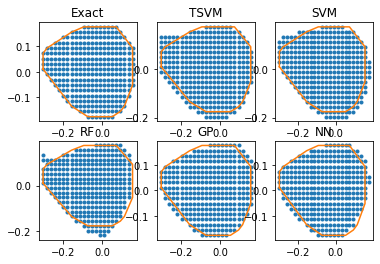

In [6]:
'''plot results'''
# envelope
hull = ConvexHull(data[np.where(label==1)[0],0:2])
hull1 = hull.vertices.tolist()
hull1.append(hull1[0])

plt.figure(1)

plt.subplot(231)
plt.plot(data[np.where(label==1)[0],0],data[np.where(label==1)[0],1],'.')
plt.plot(data[np.where(label==1)[0],0][hull1],data[np.where(label==1)[0],1][hull1])
plt.title('Exact')

plt.subplot(232)
plt.plot(data[np.where(TSVM_y==1)[0],0],data[np.where(TSVM_y==1)[0],1],'.')
plt.plot(data[np.where(label==1)[0],0][hull1],data[np.where(label==1)[0],1][hull1])
plt.title('TSVM')

plt.subplot(233)
plt.plot(data[np.where(SVM_y==1)[0],0],data[np.where(SVM_y==1)[0],1],'.')
plt.plot(data[np.where(label==1)[0],0][hull1],data[np.where(label==1)[0],1][hull1])
plt.title('SVM')

plt.subplot(234)
plt.plot(data[np.where(RF_y==1)[0],0],data[np.where(RF_y==1)[0],1],'.')
plt.plot(data[np.where(label==1)[0],0][hull1],data[np.where(label==1)[0],1][hull1])
plt.title('RF')

plt.subplot(235)
plt.plot(data[np.where(GP_y==1)[0],0],data[np.where(GP_y==1)[0],1],'.')
plt.plot(data[np.where(label==1)[0],0][hull1],data[np.where(label==1)[0],1][hull1])
plt.title('GP')

plt.subplot(236)
plt.plot(data[np.where(NN_y==1)[0],0],data[np.where(NN_y==1)[0],1],'.')
plt.plot(data[np.where(label==1)[0],0][hull1],data[np.where(label==1)[0],1][hull1])
plt.title('NN')
plt.show()